<a href="https://colab.research.google.com/github/KSaiNihal/Regression.UNP/blob/main/number_of_bike_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/day.csv")
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data=data.rename(columns={"yr":"year","mnth":"month","temp":"temperature","hum":"humidity","cnt":"count"})
data.head(5)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
data=data.drop(columns=["instant","dteday","atemp"])

In [ ]:
data[data.columns].nunique()

season           4
year             2
month           12
holiday          2
weekday          7
workingday       2
weathersit       3
temperature    499
humidity       595
windspeed      650
casual         606
registered     679
count          696
dtype: int64

In [ ]:
data.shape

(731, 13)

In [ ]:
data.isna().sum()

season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathersit     0
temperature    0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [ ]:
duplicated =data[data.duplicated()]
print('Before dropping duplicates:', data.shape[0])
print('Number of duplicate rows:', len(duplicated))

Before dropping duplicates: 731
Number of duplicate rows: 0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       731 non-null    int64  
 1   year         731 non-null    int64  
 2   month        731 non-null    int64  
 3   holiday      731 non-null    int64  
 4   weekday      731 non-null    int64  
 5   workingday   731 non-null    int64  
 6   weathersit   731 non-null    int64  
 7   temperature  731 non-null    float64
 8   humidity     731 non-null    float64
 9   windspeed    731 non-null    float64
 10  casual       731 non-null    int64  
 11  registered   731 non-null    int64  
 12  count        731 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 74.4 KB


In [ ]:
data.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
data

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [ ]:
data['season']=data.season.astype('category')
data['month']=data.month.astype('category')
data['weekday']=data.weekday.astype('category')
data['weathersit']=data.weathersit.astype('category')

In [ ]:
data["season"]=data.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'))
data["month"]=data.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
data["weathersit"]=data.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_Rain'))
data["weekday"]=data.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))

In [ ]:
data

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,casual,registered,count
0,Spring,0,Jan,0,Saturday,0,Misty,0.344167,0.805833,0.160446,331,654,985
1,Spring,0,Jan,0,Sunday,0,Misty,0.363478,0.696087,0.248539,131,670,801
2,Spring,0,Jan,0,Monday,1,Clear,0.196364,0.437273,0.248309,120,1229,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,0.200000,0.590435,0.160296,108,1454,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Spring,1,Dec,0,Thursday,1,Misty,0.254167,0.652917,0.350133,247,1867,2114
727,Spring,1,Dec,0,Friday,1,Misty,0.253333,0.590000,0.155471,644,2451,3095
728,Spring,1,Dec,0,Saturday,0,Misty,0.253333,0.752917,0.124383,159,1182,1341
729,Spring,1,Dec,0,Sunday,0,Clear,0.255833,0.483333,0.350754,364,1432,1796


In [ ]:
df = copy.deepcopy(data)
df

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,casual,registered,count
0,Spring,0,Jan,0,Saturday,0,Misty,0.344167,0.805833,0.160446,331,654,985
1,Spring,0,Jan,0,Sunday,0,Misty,0.363478,0.696087,0.248539,131,670,801
2,Spring,0,Jan,0,Monday,1,Clear,0.196364,0.437273,0.248309,120,1229,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,0.200000,0.590435,0.160296,108,1454,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Spring,1,Dec,0,Thursday,1,Misty,0.254167,0.652917,0.350133,247,1867,2114
727,Spring,1,Dec,0,Friday,1,Misty,0.253333,0.590000,0.155471,644,2451,3095
728,Spring,1,Dec,0,Saturday,0,Misty,0.253333,0.752917,0.124383,159,1182,1341
729,Spring,1,Dec,0,Sunday,0,Clear,0.255833,0.483333,0.350754,364,1432,1796


In [ ]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [ ]:
df["month"]=df.month.replace(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'),('first_quarter','first_quarter','first_quarter','secound_quarter',
                                                                                                                  'secound_quarter','secound_quarter','third_quarter','third_quarter',
                                                                                                                  'third_quarter','forth_quarter','forth_quarter','forth_quarter'))

In [ ]:
df

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,casual,registered,count
0,Spring,0,first_quarter,0,Saturday,0,Misty,0.344167,0.805833,0.160446,331,654,985
1,Spring,0,first_quarter,0,Sunday,0,Misty,0.363478,0.696087,0.248539,131,670,801
2,Spring,0,first_quarter,0,Monday,1,Clear,0.196364,0.437273,0.248309,120,1229,1349
3,Spring,0,first_quarter,0,Tuesday,1,Clear,0.200000,0.590435,0.160296,108,1454,1562
4,Spring,0,first_quarter,0,Wednesday,1,Clear,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Spring,1,forth_quarter,0,Thursday,1,Misty,0.254167,0.652917,0.350133,247,1867,2114
727,Spring,1,forth_quarter,0,Friday,1,Misty,0.253333,0.590000,0.155471,644,2451,3095
728,Spring,1,forth_quarter,0,Saturday,0,Misty,0.253333,0.752917,0.124383,159,1182,1341
729,Spring,1,forth_quarter,0,Sunday,0,Clear,0.255833,0.483333,0.350754,364,1432,1796


In [ ]:
print(df['season'].unique())
print(df['month'].unique())
print(df['weathersit'].unique())

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
['first_quarter', 'secound_quarter', 'third_quarter', 'forth_quarter']
Categories (4, object): ['first_quarter', 'secound_quarter', 'third_quarter', 'forth_quarter']
['Misty', 'Clear', 'Light_rainsnow']
Categories (3, object): ['Clear', 'Misty', 'Light_rainsnow']


In [ ]:
df=df.drop(columns=['weekday',"holiday"])

In [ ]:
columns_to_encode = ['season', 'month', 'weathersit']
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

In [ ]:
df

,year,workingday,temperature,humidity,windspeed,casual,registered,count,season_Spring,season_Summer,season_Fall,season_Winter,month_first_quarter,month_secound_quarter,month_third_quarter,month_forth_quarter,weathersit_Clear,weathersit_Misty,weathersit_Light_rainsnow
0,0,0,0.344167,0.805833,0.160446,331,654,985,1,0,0,0,1,0,0,0,0,1,0
1,0,0,0.363478,0.696087,0.248539,131,670,801,1,0,0,0,1,0,0,0,0,1,0
2,0,1,0.196364,0.437273,0.248309,120,1229,1349,1,0,0,0,1,0,0,0,1,0,0
3,0,1,0.200000,0.590435,0.160296,108,1454,1562,1,0,0,0,1,0,0,0,1,0,0
4,0,1,0.226957,0.436957,0.186900,82,1518,1600,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,0.254167,0.652917,0.350133,247,1867,2114,1,0,0,0,0,0,0,1,0,1,0
727,1,1,0.253333,0.590000,0.155471,644,2451,3095,1,0,0,0,0,0,0,1,0,1,0
728,1,0,0.253333,0.752917,0.124383,159,1182,1341,1,0,0,0,0,0,0,1,0,1,0
729,1,0,0.255833,0.483333,0.350754,364,1432,1796,1,0,0,0,0,0,0,1,1,0,0


#Data EDA

<ipython-input-25-4e14ab1d5bcc>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


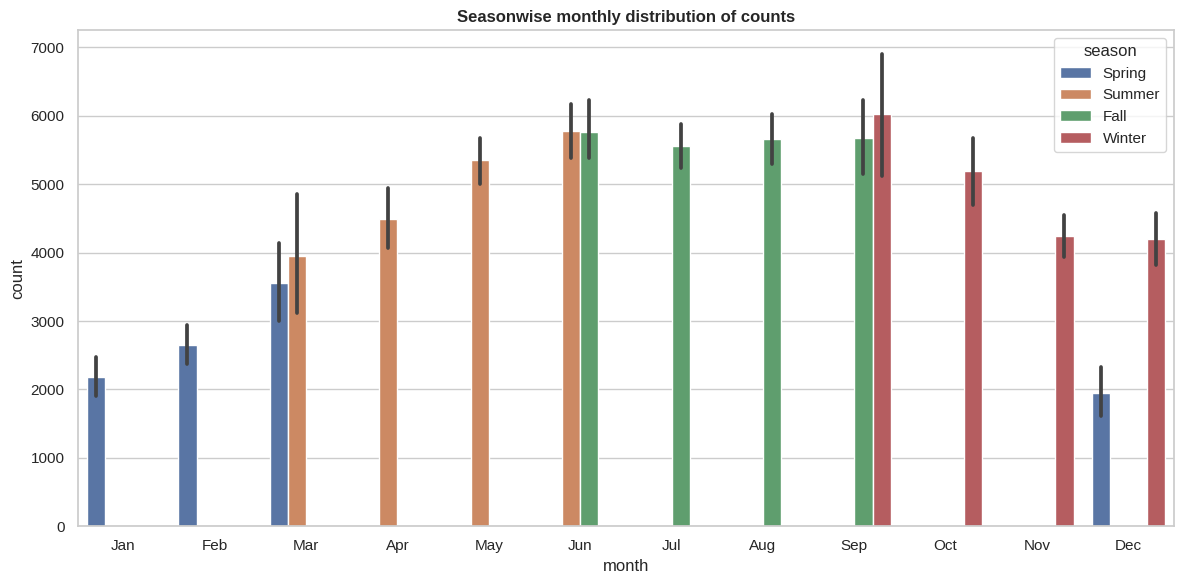

In [ ]:
sns.set(style="whitegrid")
fig,ax=plt.subplots(figsize=(12,6))
sns.set_style('white')
sns.barplot(x='month',y='count',data=data[['month','count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts', fontweight='bold')
plt.style.use('seaborn')
plt.tight_layout()
plt.show()

<ipython-input-26-3f4f6c419825>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


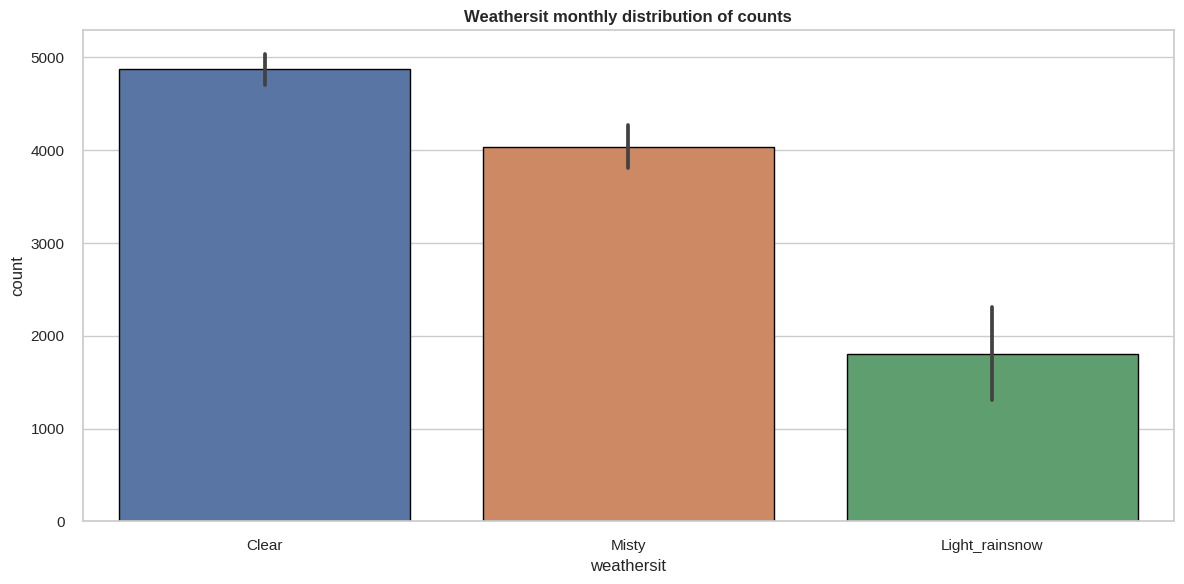

In [ ]:
sns.set(style="whitegrid")
fig,ax=plt.subplots(figsize=(12,6))
sns.set_style('white')
sns.barplot(x='weathersit',y='count',data=data[['weathersit','count']],ax=ax,edgecolor='black')
ax.set_title('Weathersit monthly distribution of counts', fontweight='bold')
plt.style.use('seaborn')
plt.tight_layout()
plt.show()

<ipython-input-27-fcb52ced793a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


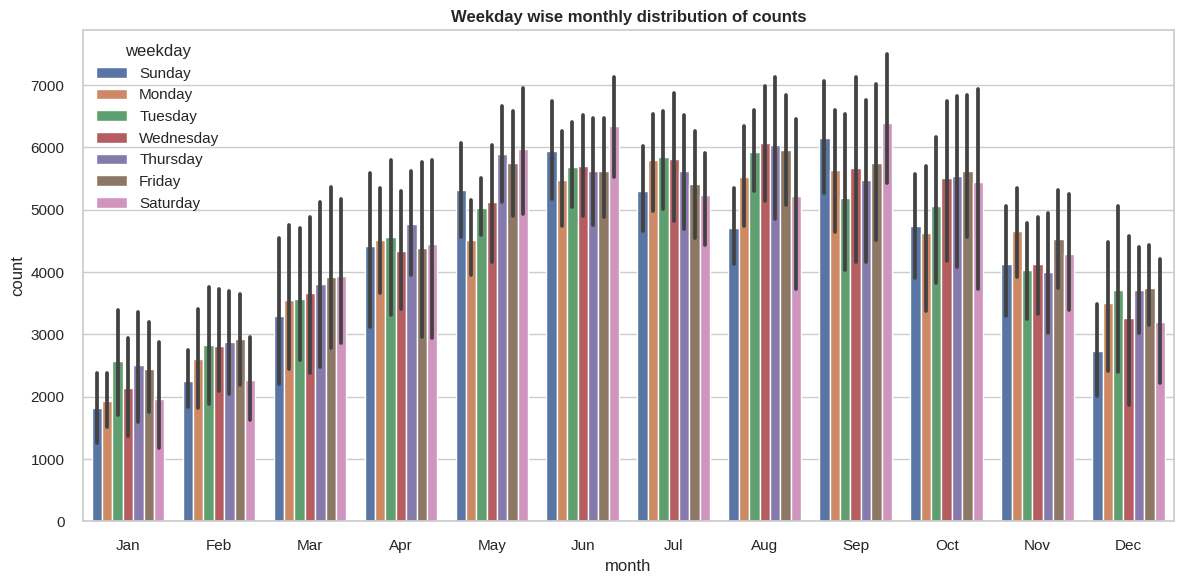

In [ ]:
sns.set(style="whitegrid")
fig,ax1=plt.subplots(figsize=(12,6))
sns.barplot(x='month',y='count',data=data[['month','count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts', fontweight='bold')
plt.style.use('seaborn')
plt.tight_layout()
plt.show()

<ipython-input-28-0efa15d0691c>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


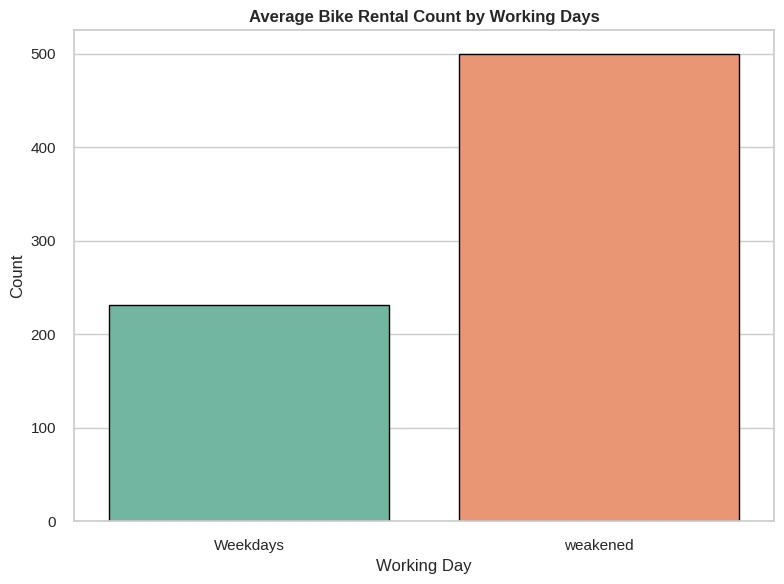

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="workingday", data=data, palette="Set2",edgecolor='black')
plt.gca().set_xticklabels(['Weekdays', 'weakened'])
plt.xlabel("Working Day")
plt.ylabel("Count")
plt.title("Average Bike Rental Count by Working Days", fontweight='bold')
plt.style.use('seaborn')
plt.tight_layout()
plt.show()

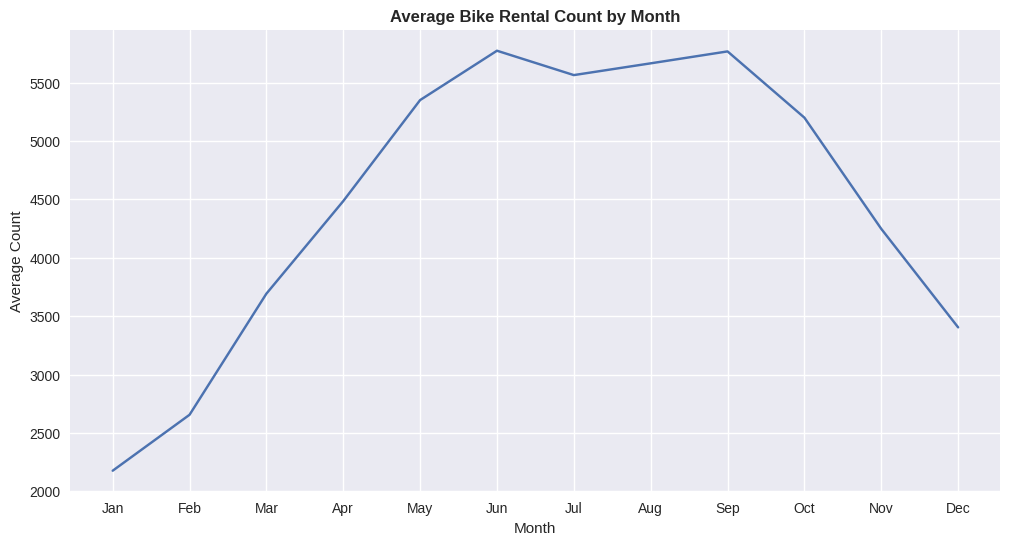

In [ ]:
plt.figure(figsize=(12, 6))
monthly_counts = data.groupby('month')['count'].mean()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Average Bike Rental Count by Month', fontweight='bold')
plt.show()

<ipython-input-30-7a68b4008f23>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


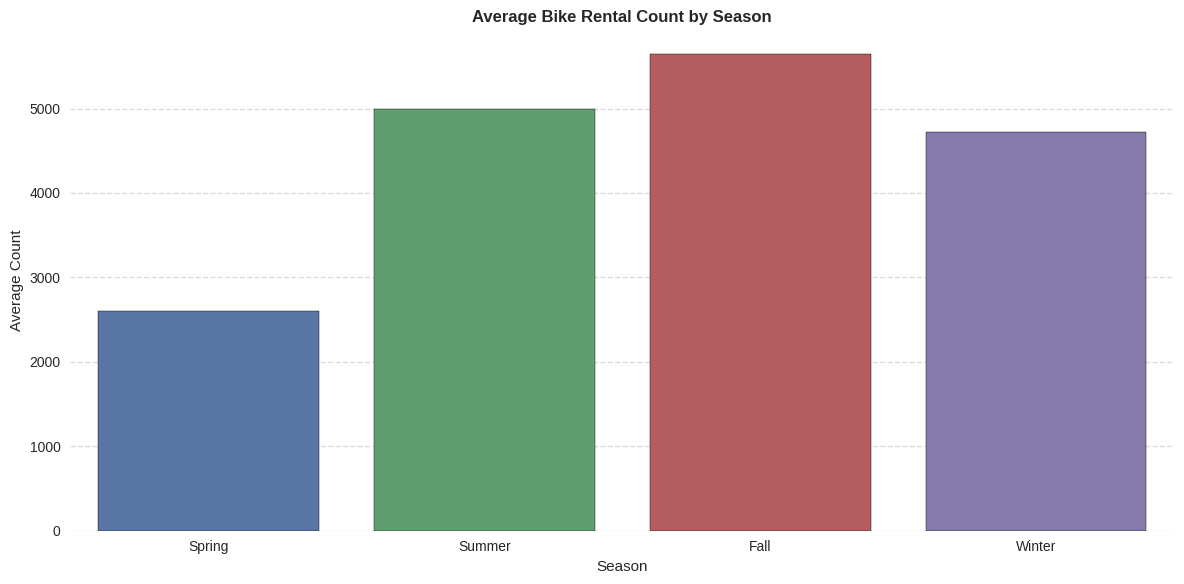

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
season_counts = data.groupby('season')['count'].mean()
sns.barplot(x=season_counts.index, y=season_counts.values, edgecolor='black')
plt.xlabel('Season')
plt.ylabel('Average Count')
plt.title('Average Bike Rental Count by Season', fontweight='bold')
plt.xticks(range(4), ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('seaborn')
plt.tight_layout()
plt.show()

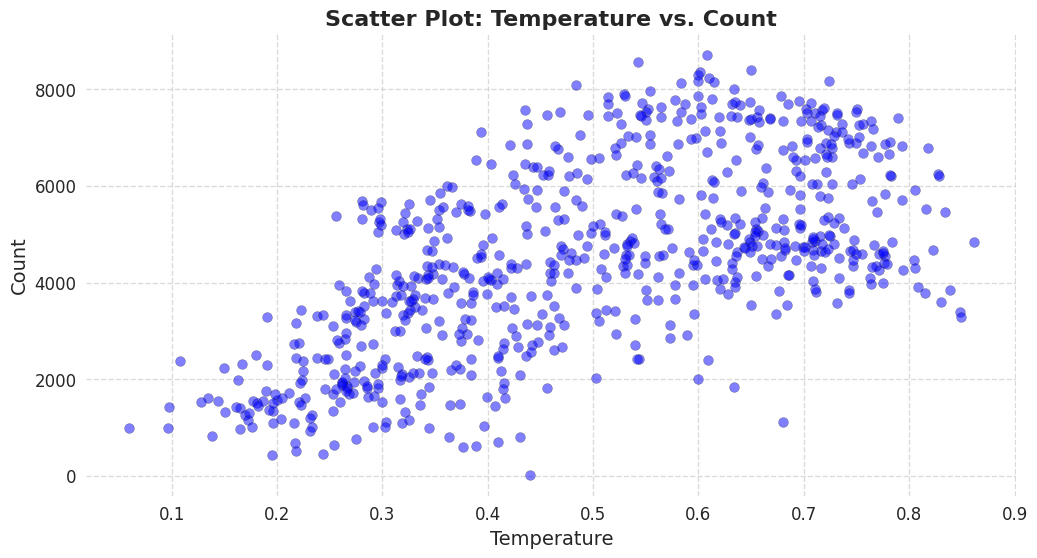

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(data['temperature'], data['count'], alpha=0.5, c='blue', edgecolors='k', s=50)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Scatter Plot: Temperature vs. Count', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-32-076232200c95>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


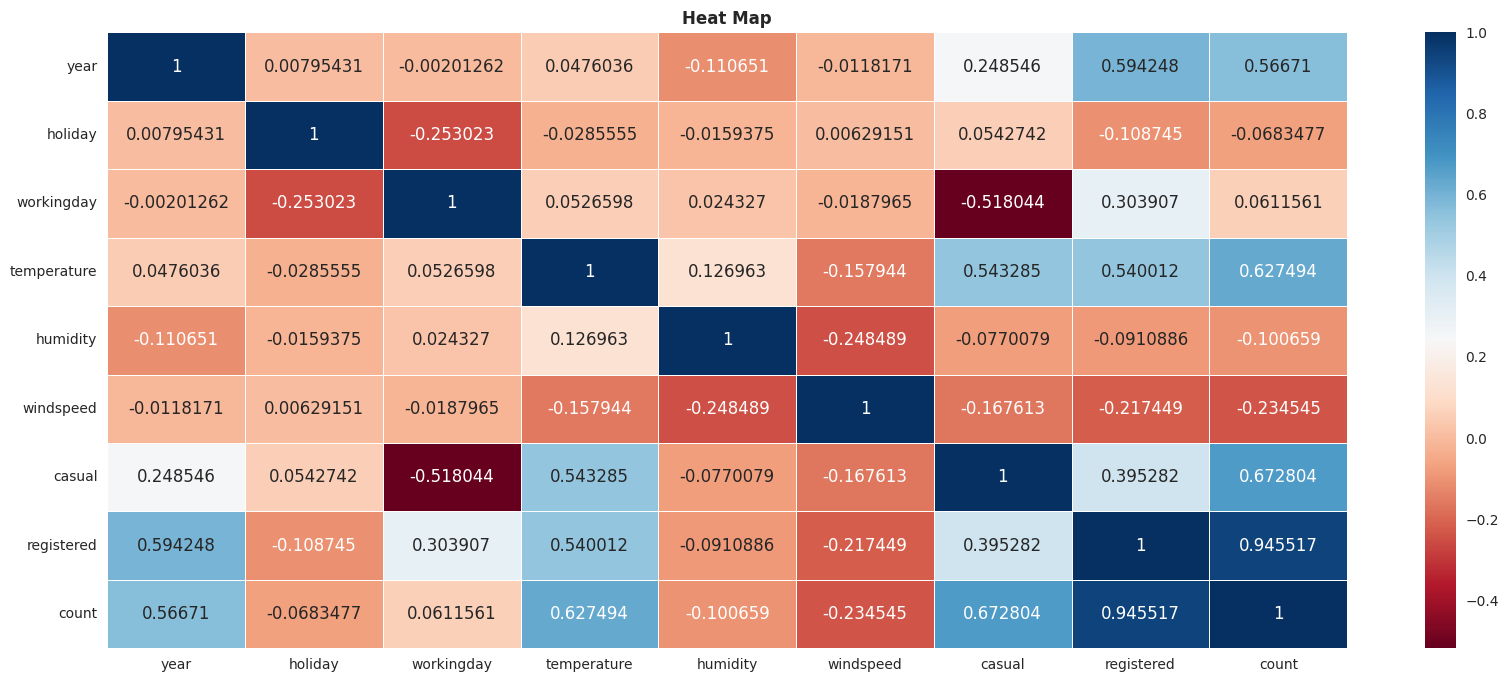

In [ ]:
fig = plt.figure(figsize=(20,8))
corr = data.corr()
plt.title('Heat Map', fontweight='bold')
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

#Linear Regression


In [ ]:
x=df.drop(columns=["count",'casual','registered'],axis=1)
y=df['count']

In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=0.35,random_state=46)

In [ ]:
print(x_train_1.shape)
print(y_train_1.shape)
print(x_test_1.shape)
print(y_test_1.shape)

(475, 16)
(475,)
(256, 16)
(256,)


In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(x_train_1,y_train_1)

LinearRegression()

In [ ]:
prediction_1=reg.predict(x_test_1)

In [ ]:
mse=mean_squared_error(y_test_1,prediction_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,prediction_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 663458.1586201206
Mean Absolute Error: 585.6972531500958
Root Mean Squared Error : 814.5294093033846


In [ ]:
r2=r2_score(y_test_1,prediction_1)
print("R2 score:",r2)

R2 score: 0.8086044777147636


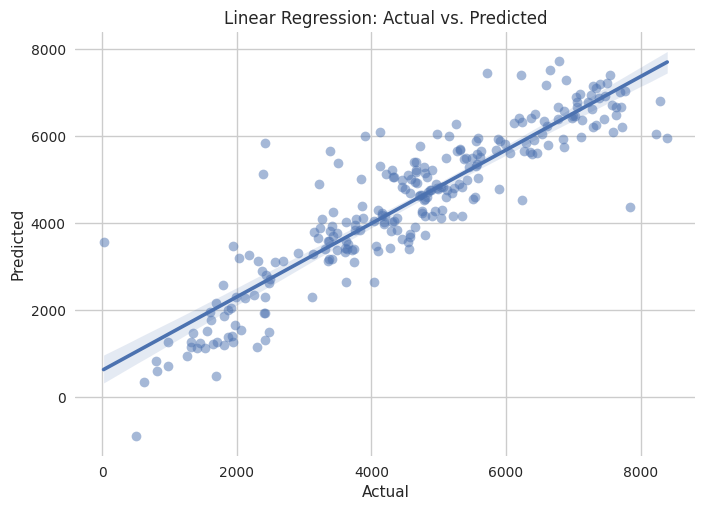

In [ ]:
sns.regplot(x=y_test_1, y=prediction_1, scatter_kws={'alpha': 0.5})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x,y,test_size=0.30,random_state=85)

In [ ]:
print(x_train_2.shape)
print(y_train_2.shape)
print(x_test_2.shape)
print(y_test_2.shape)

(511, 16)
(511,)
(220, 16)
(220,)


In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(x_train_2,y_train_2)

LinearRegression()

In [ ]:
prediction_2=reg.predict(x_test_2)

In [ ]:
mse=mean_squared_error(y_test_2,prediction_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,prediction_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 766179.3090909091
Mean Absolute Error: 637.4545454545455
Root Mean Squared Error : 875.3166907416476


In [ ]:
r2=r2_score(y_test_2,prediction_2)
print("R2 score:",r2)

R2 score: 0.792831337614635


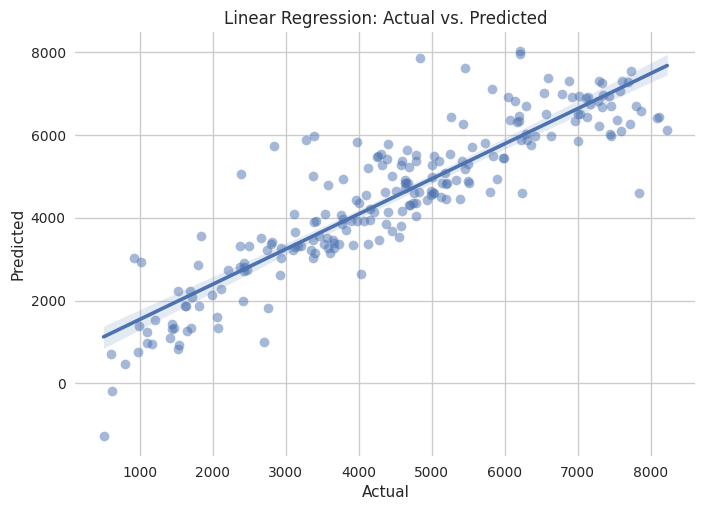

In [ ]:
sns.regplot(x=y_test_2, y=prediction_2, scatter_kws={'alpha': 0.5})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

In [ ]:
# Train and Test Data Splited Into 75:25 Ratio
x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(x,y,test_size=0.25,random_state=45)

In [ ]:
print(x_train_3.shape)
print(y_train_3.shape)
print(x_test_3.shape)
print(y_test_3.shape)

(548, 16)
(548,)
(183, 16)
(183,)


In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(x_train_3,y_train_3)

LinearRegression()

In [ ]:
prediction_3=reg.predict(x_test_3)

In [ ]:
mse=mean_squared_error(y_test_3,prediction_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,prediction_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 710227.5824000455
Mean Absolute Error: 612.3556690548191
Root Mean Squared Error : 842.7500118066125


In [ ]:
r2=r2_score(y_test_3,prediction_3)
print("R2 score:",r2)

R2 score: 0.8067027071364901


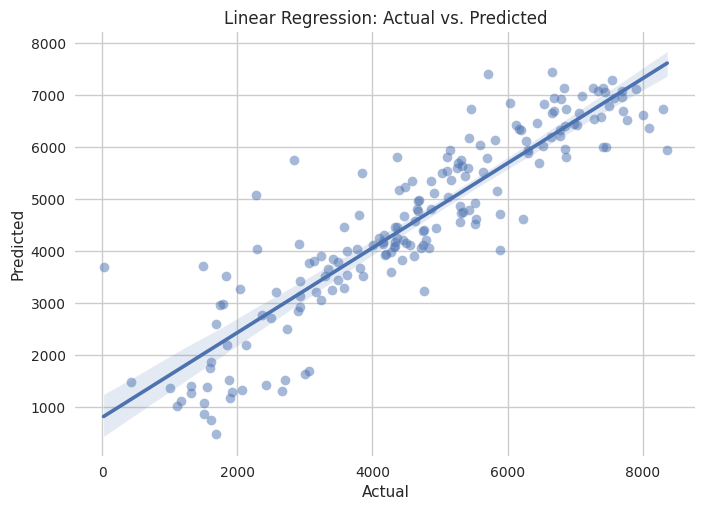

In [ ]:
sns.regplot(x=y_test_3, y=prediction_3, scatter_kws={'alpha': 0.5})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
x_train_4,x_test_4,y_train_4,y_test_4=train_test_split(x,y,test_size=0.20,random_state=25)

In [ ]:
print(x_train_4.shape)
print(y_train_4.shape)
print(x_test_4.shape)
print(y_test_4.shape)

(584, 16)
(584,)
(147, 16)
(147,)


In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(x_train_4,y_train_4)

LinearRegression()

In [ ]:
prediction_4=reg.predict(x_test_4)

In [ ]:
mse=mean_squared_error(y_test_4,prediction_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,prediction_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 562353.9863945579
Mean Absolute Error: 571.6326530612245
Root Mean Squared Error : 749.9026512785229


In [ ]:
r2=r2_score(y_test_4,prediction_4)
print("R2 score:",r2)

R2 score: 0.8351143040972442


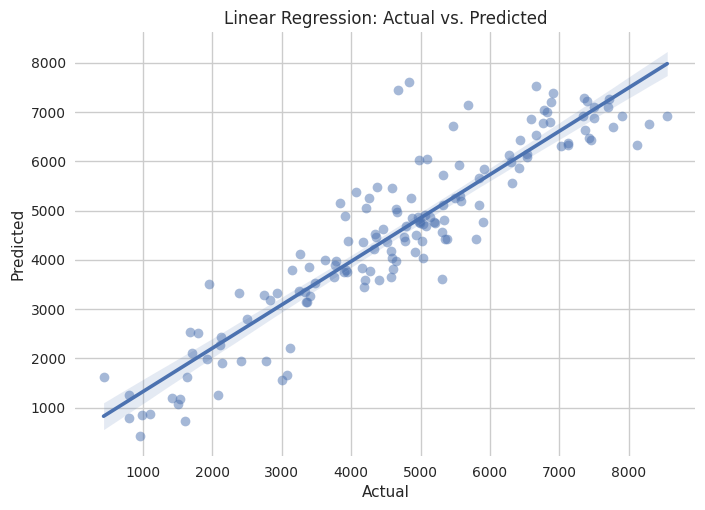

In [ ]:
sns.regplot(x=y_test_4, y=prediction_4, scatter_kws={'alpha': 0.5})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

# Decision Tree Regressor






In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
regressor=DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,min_samples_split=10,random_state=5)  #{'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}

In [ ]:
regressor.fit(x_test_1,y_test_1)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, random_state=5)

In [ ]:
y_predicted_1=regressor.predict(x_test_1)

In [ ]:
y_predicted_1[1:5]

array([5210.85714286, 1867.55555556, 5311.9       , 5423.        ])

In [ ]:
mse=mean_squared_error(y_test_1,y_predicted_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,y_predicted_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 161837.78230716765
Mean Absolute Error: 304.037146577381
Root Mean Squared Error : 402.29066892878296


In [ ]:
r2=r2_score(y_test_1,y_predicted_1)
print("R2 score :",r2)

R2 score : 0.9533127651416821


In [ ]:
cross_val_score(regressor,x_test_1,y_test_1,cv=10)      #cross validation

array([0.89115232, 0.88455367, 0.68850511, 0.77983775, 0.81177179,
       0.51985079, 0.65253558, 0.745071  , 0.75953954, 0.74362352])

In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
regressor=DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,min_samples_split=10,random_state=5)  #{'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}

In [ ]:
regressor.fit(x_test_2,y_test_2)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, random_state=5)

In [ ]:
y_predicted_2=regressor.predict(x_test_2)

In [ ]:
y_predicted_2[1:5]

array([4790.5       , 7160.22222222, 2573.125     , 4494.4       ])

In [ ]:
mse=mean_squared_error(y_test_2,y_predicted_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,y_predicted_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 158419.0287193362
Mean Absolute Error: 282.61621933621933
Root Mean Squared Error : 398.01887985287357


In [ ]:
r2=r2_score(y_test_2,y_predicted_2)
print("R2 score :",r2)

R2 score : 0.9571647812897549


In [ ]:
cross_val_score(regressor,x_test_2,y_test_2,cv=10)      #cross validation

array([0.75510144, 0.808756  , 0.86265815, 0.76953381, 0.68913159,
       0.81836127, 0.83361594, 0.70500032, 0.79890809, 0.82525807])

In [ ]:
# Train and Test Data Splited Into 75:25 Ratio
regressor=DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,min_samples_split=10,random_state=5)  #{'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}

In [ ]:
regressor.fit(x_test_3,y_test_3)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, random_state=5)

In [ ]:
y_predicted_3=regressor.predict(x_test_3)

In [ ]:
y_predicted_3[1:5]

array([5270.33333333, 5945.66666667, 5106.375     , 2713.        ])

In [ ]:
mse=mean_squared_error(y_test_3,y_predicted_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,y_predicted_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 222481.6436724781
Mean Absolute Error: 334.9328259172521
Root Mean Squared Error : 471.6795985332396


In [ ]:
r2=r2_score(y_test_3,y_predicted_3)
print("R2 score :",r2)

R2 score : 0.9394488463988


In [ ]:
cross_val_score(regressor,x_test_3,y_test_3,cv=10)      #cross validation

array([0.71723538, 0.72899169, 0.83462138, 0.64512723, 0.6802456 ,
       0.6367202 , 0.62428919, 0.44272051, 0.90824971, 0.71370181])

In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
regressor=DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,min_samples_split=10,random_state=5)  #{'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}

In [ ]:
regressor.fit(x_test_4,y_test_4)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, random_state=5)

In [ ]:
y_predicted_4=regressor.predict(x_test_4)

In [ ]:
y_predicted_4[1:5]

array([4971.11111111, 1295.        , 6888.33333333, 6888.33333333])

In [ ]:
mse=mean_squared_error(y_test_4,y_predicted_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,y_predicted_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 162907.65639239823
Mean Absolute Error: 310.8009070294785
Root Mean Squared Error : 403.6182062201831


In [ ]:
r2=r2_score(y_test_4,y_predicted_4)
print("R2 score :",r2)

R2 score : 0.9522344591804826


In [ ]:
cross_val_score(regressor,x_test_4,y_test_4,cv=10)      #cross validation

array([0.66993186, 0.78311782, 0.70537584, 0.67589183, 0.82725429,
       0.78174364, 0.8738073 , 0.82994109, 0.79163737, 0.61975957])

#Random Forest Regressor


In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train_1,y_train_1)

RandomForestRegressor()

In [ ]:
y_pred_1=rf.predict(x_test_1)

In [ ]:
y_pred_1[1:20]

array([6762.13, 1712.09, 3409.37, 4251.46, 2577.34, 2779.  , 4547.11,
       4572.37, 2940.56, 6300.04, 3374.83, 7362.4 , 2845.61, 3388.19,
       2790.35, 3998.44, 6384.7 , 4750.97, 1850.03])

In [ ]:
mse=mean_squared_error(y_test_1,y_pred_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,y_pred_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 531095.0455664063
Mean Absolute Error: 494.766171875
Root Mean Squared Error : 728.7626812388285


In [ ]:
r2=r2_score(y_test_1,y_pred_1)
print("R2 score :",r2)

R2 score : 0.8467888105548408


In [ ]:
cross_val_score(regressor,x_test_1,y_test_1,cv=10)      #cross validation

array([0.89115232, 0.88455367, 0.68850511, 0.77983775, 0.81177179,
       0.51985079, 0.65253558, 0.745071  , 0.75953954, 0.74362352])

In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train_2,y_train_2)

RandomForestRegressor()

In [ ]:
y_pred_2=rf.predict(x_test_2)

In [ ]:
y_predicted_2[1:20]

array([4790.5       , 7160.22222222, 2573.125     , 4494.4       ,
       6713.5       , 3524.22222222, 5708.8       , 4790.5       ,
       1602.5       , 2573.125     , 4014.75      , 4760.25      ,
       7263.5       , 3524.22222222, 5708.8       , 7263.5       ,
        941.8       , 2573.125     , 5708.8       ])

In [ ]:
mse=mean_squared_error(y_test_2,y_pred_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,y_pred_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 401329.614555909
Mean Absolute Error: 454.6478636363637
Root Mean Squared Error : 633.5058125667902


In [ ]:
r2=r2_score(y_test_2,y_pred_2)
print("R2 score :",r2)

R2 score : 0.8914837317626955


In [ ]:
# Train and Test Data Splited Into 75:25 Ratio
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train_3,y_train_3)

RandomForestRegressor()

In [ ]:
y_pred_3=rf.predict(x_test_3)

In [ ]:
y_pred_3[1:20]

array([5345.37, 6771.78, 7002.31, 2969.8 , 3247.35, 6044.33, 5206.98,
       7447.17, 4624.42, 4487.35, 6095.89, 2753.14, 7434.47, 3888.39,
       2408.18, 6433.71, 5393.82, 7328.99, 1922.14])

In [ ]:
mse=mean_squared_error(y_test_3,y_pred_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,y_pred_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 588101.7234245902
Mean Absolute Error: 518.8489071038251
Root Mean Squared Error : 766.8779064652927


In [ ]:
r2=r2_score(y_test_3,y_pred_3)
print("R2 score :",r2)

R2 score : 0.8399407825274985


In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train_4,y_train_4)

RandomForestRegressor()

In [ ]:
y_pred_4=rf.predict(x_test_4)

In [ ]:
y_pred_4[1:20]

array([4837.2 , 2422.84, 6940.75, 6429.08, 4287.94, 2326.98, 7055.86,
       2484.54, 6696.64, 3908.92, 6002.31, 1034.38, 3015.56, 5225.19,
       3359.62, 1721.75, 6761.82, 4969.48, 6986.47])

In [ ]:
mse=mean_squared_error(y_test_4,y_pred_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,y_pred_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 378071.10829591844
Mean Absolute Error: 466.70959183673466
Root Mean Squared Error : 614.8748720641611


In [ ]:
r2=r2_score(y_test_4,y_pred_4)
print("R2 score :",r2)

R2 score : 0.8891471932265084


#KNN Regressor

In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(x_train_1,y_train_1)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
y_pred_1=knn_regressor.predict(x_test_1)

In [ ]:
y_pred_1[1:20]

array([6262.36363636, 1773.90909091, 6027.72727273, 4800.63636364,
       3113.81818182, 3176.63636364, 3577.27272727, 4523.        ,
       3828.72727273, 5500.27272727, 2674.        , 6858.27272727,
       4698.18181818, 2517.90909091, 3203.09090909, 3707.36363636,
       5135.09090909, 4503.54545455, 1567.09090909])

In [ ]:
mse=mean_squared_error(y_test_1,y_pred_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,y_pred_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 795045.5927492252
Mean Absolute Error: 636.780184659091
Root Mean Squared Error : 891.65329178399


In [ ]:
r2=r2_score(y_test_1,y_pred_1)
print("R2 score :",r2)

R2 score : 0.7706439140317498


In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(x_train_2,y_train_2)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
y_pred_2=knn_regressor.predict(x_test_2)

In [ ]:
y_pred_2[1:20]

array([5861.72727273, 7096.90909091, 3401.63636364, 4814.54545455,
       7247.72727273, 3975.90909091, 6991.81818182, 3982.        ,
       1642.18181818, 3889.09090909, 4050.18181818, 5066.90909091,
       7246.27272727, 3647.18181818, 6175.27272727, 7021.90909091,
       1555.54545455, 3485.45454545, 6274.63636364])

In [ ]:
mse=mean_squared_error(y_test_2,y_pred_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,y_pred_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 750052.9238166793
Mean Absolute Error: 627.0801652892561
Root Mean Squared Error : 866.0559588252247


In [ ]:
r2=r2_score(y_test_2,y_pred_2)
print("R2 score :",r2)

R2 score : 0.7971917812167172


In [ ]:
# Train and Test Data Splited Into 75:35 Ratio
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(x_train_3,y_train_3)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
y_pred_3=knn_regressor.predict(x_test_3)

In [ ]:
y_pred_3[1:20]

array([5790.81818182, 6970.90909091, 6071.18181818, 3553.45454545,
       3589.45454545, 5343.09090909, 4549.72727273, 6730.63636364,
       4673.        , 3589.45454545, 5825.81818182, 3437.18181818,
       7179.90909091, 3924.63636364, 2407.90909091, 6451.27272727,
       5453.        , 7276.36363636, 1764.36363636])

In [ ]:
mse=mean_squared_error(y_test_3,y_pred_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,y_pred_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 795234.9849613874
Mean Absolute Error: 625.9781420765028
Root Mean Squared Error : 891.7594882934453


In [ ]:
r2=r2_score(y_test_3,y_pred_3)
print("R2 score :",r2)

R2 score : 0.7835668825139952


In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(x_train_4,y_train_4)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
y_pred_4=knn_regressor.predict(x_test_4)

In [ ]:
y_pred_4[1:20]

array([4850.27272727, 3586.90909091, 6856.27272727, 7043.18181818,
       4290.81818182, 3524.27272727, 7219.45454545, 3043.45454545,
       6742.18181818, 3832.45454545, 5538.81818182, 1561.63636364,
       1680.18181818, 6021.09090909, 4225.90909091, 1525.18181818,
       6388.45454545, 4637.81818182, 6215.54545455])

In [ ]:
mse=mean_squared_error(y_test_4,y_pred_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,y_pred_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 648680.5728903131
Mean Absolute Error: 607.7773654916513
Root Mean Squared Error : 805.4070851999709


In [ ]:
r2=r2_score(y_test_4,y_pred_4)
print("R2 score :",r2)

R2 score : 0.8098028105653478


#SVM Regressor

In [ ]:
# Train and Test Data Splited Into 65:35 Ratio
model=SVR(C=200,kernel="linear")

In [ ]:
model.fit(x_train_1,y_train_1)

SVR(C=200, kernel='linear')

In [ ]:
y_pred_1=model.predict(x_test_1)

In [ ]:
mse=mean_squared_error(y_test_1,y_pred_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,y_pred_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 707066.9751356451
Mean Absolute Error: 610.6268660377314
Root Mean Squared Error : 840.8727461011239


In [ ]:
model.score(x_test_1,y_test_1)

0.7960241331899646

In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
model=SVR(C=200,kernel="linear")

In [ ]:
model.fit(x_train_2,y_train_2)

SVR(C=200, kernel='linear')

In [ ]:
y_pred_2=model.predict(x_test_2)

In [ ]:
mse=mean_squared_error(y_test_2,y_pred_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,y_pred_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 708046.942303411
Mean Absolute Error: 615.8209516930008
Root Mean Squared Error : 841.4552527041536


In [ ]:
model.score(x_test_2,y_test_2)

0.8085498574516572

In [ ]:
# Train and Test Data Splited Into 75:35 Ratio
model=SVR(C=200,kernel="linear")

In [ ]:
model.fit(x_train_3,y_train_3)

SVR(C=200, kernel='linear')

In [ ]:
y_pred_3=model.predict(x_test_3)

In [ ]:
mse=mean_squared_error(y_test_3,y_pred_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,y_pred_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 843500.5098604802
Mean Absolute Error: 666.3742059693374
Root Mean Squared Error : 918.4228382724813


In [ ]:
model.score(x_test_3,y_test_3)

0.770430818056876

In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
model=SVR(C=200,kernel="linear")

In [ ]:
model.fit(x_train_4,y_train_4)

SVR(C=200, kernel='linear')

In [ ]:
y_pred_4=model.predict(x_test_4)

In [ ]:
mse=mean_squared_error(y_test_4,y_pred_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,y_pred_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 629804.0277638427
Mean Absolute Error: 612.1839586553654
Root Mean Squared Error : 793.6019328125674


In [ ]:
model.score(x_test_4,y_test_4)

0.815337531319037